In [45]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.utils import resample
from pathlib import Path
import random
from sklearn.preprocessing import LabelEncoder



Number of classes: 16
Columns in sampled_images: Index(['Label', 'Filepath', 'Encoded_Label'], dtype='object')


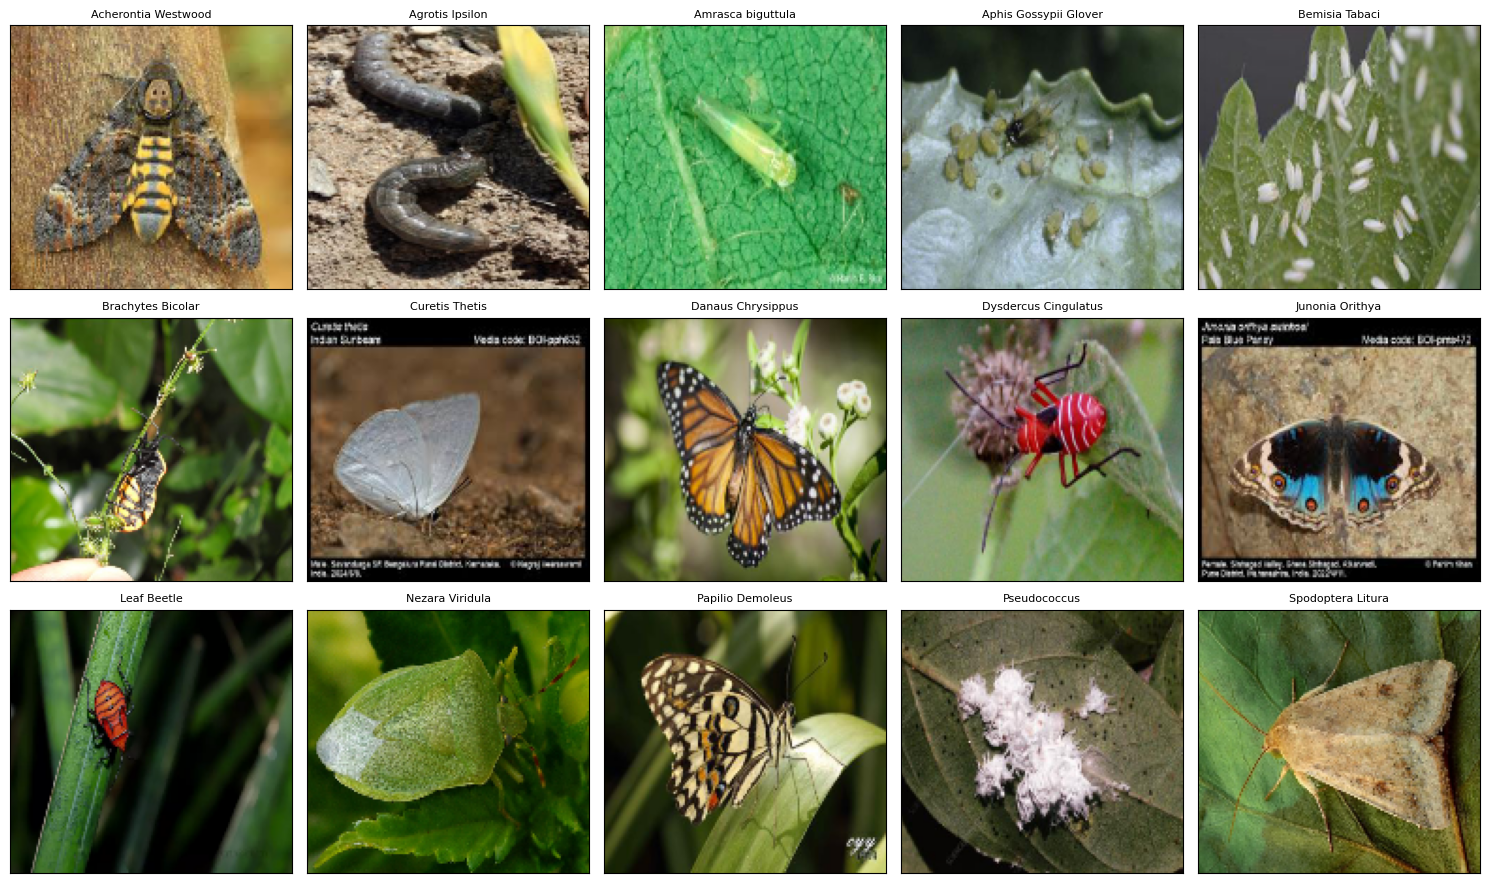

In [46]:


def load_data(data_path):
    filepaths = []
    labels = []
    
   
    for plant_class in data_path.iterdir():
        if plant_class.is_dir():
        
            for image_file in plant_class.iterdir(): 
                if image_file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.webp']:
                    filepaths.append(image_file)
                    label = f"{plant_class.name}"  
                    labels.append(label)

  
    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

# Load train and test data
train_dir = Path(r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Final Code\Dataset\train")
test_dir = Path(r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Final Code\Dataset\test")


train_image_df = load_data(train_dir)
test_image_df = load_data(test_dir)

# Encode the labels
label_encoder = LabelEncoder()
train_image_df['Encoded_Label'] = label_encoder.fit_transform(train_image_df['Label'])
test_image_df['Encoded_Label'] = label_encoder.transform(test_image_df['Label'])

# Display the number of classes
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")

# Sample one image per class for visualization
sampled_images = train_image_df.groupby('Label').first().reset_index() 


print("Columns in sampled_images:", sampled_images.columns)

# Plotting the sampled images
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = sampled_images.Filepath.iloc[i]
    img = plt.imread(img_path)
    
 
    if img.ndim == 2:  
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
   
    img_resized = cv2.resize(img, (150, 140))
    
 
    ax.set_title(sampled_images.Label.iloc[i], fontsize=8)
    ax.imshow(img_resized)

plt.tight_layout()
plt.show()


In [47]:

print(train_image_df.head())

print(test_image_df.head())

label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

for encoded_class, label in label_mapping.items():
    print(f"Class {encoded_class}: {label}")


                                            Filepath                Label  \
0  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
1  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
2  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
3  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
4  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   

   Encoded_Label  
0              0  
1              0  
2              0  
3              0  
4              0  
                                            Filepath                Label  \
0  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
1  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
2  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
3  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
4  C:\Users\Apollo Gadget\Documents\Th

In [48]:

combined_image_df = pd.concat([train_image_df, test_image_df])

class_counts = combined_image_df['Label'].value_counts()


print("Total number of images per class (train + test):")
print(class_counts)


Total number of images per class (train + test):
Label
Aphis Gossypii Glover    261
Danaus Chrysippus        140
Nezara Viridula          140
Amrasca biguttula        130
Dysdercus Cingulatus     127
Pseudococcus             125
Bemisia Tabaci           122
Papilio Demoleus         121
Spodoptera Litura        120
Leaf Beetle              101
Agrotis Ipsilon           89
Acherontia Westwood       86
Brachytes Bicolar         76
Tetranychus Koch          73
Junonia Orithya           64
Curetis Thetis            47
Name: count, dtype: int64


In [49]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    train_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 1129 validated image filenames belonging to 16 classes.
Found 374 validated image filenames belonging to 16 classes.


C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 35 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rescale=1./255,                 
    rotation_range=20,             
    width_shift_range=0.2,       
    height_shift_range=0.2,      
    shear_range=0.15,            
    zoom_range=0.2,               
    horizontal_flip=True,      
    vertical_flip=True,           
    validation_split=0.2       
)

train_generator = datagen.flow_from_dataframe(
    train_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),       
    class_mode='categorical',
    batch_size=32,
    subset='training'             
)

# Prepare the validation data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False                 
)


Found 1129 validated image filenames belonging to 16 classes.
Found 374 validated image filenames belonging to 16 classes.


C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 35 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


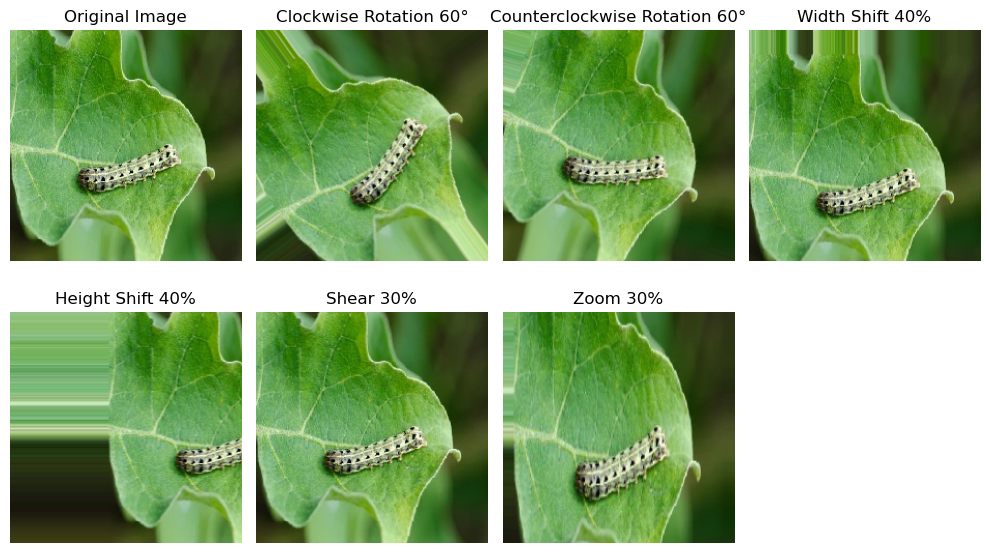

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


sample_image_path = r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Final Code\Dataset\train\Spodoptera Litura\image.jpg"

img = image.load_img(sample_image_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

augmentations = {
    "Clockwise Rotation 60°": ImageDataGenerator(rotation_range=-45), 
    "Counterclockwise Rotation 60°": ImageDataGenerator(rotation_range=45),  
    "Width Shift 40%": ImageDataGenerator(width_shift_range=0.5),
    "Height Shift 40%": ImageDataGenerator(height_shift_range=0.5),
    "Shear 30%": ImageDataGenerator(shear_range=0.3),
    "Zoom 30%": ImageDataGenerator(zoom_range=[0.5, 1.5])
}


plt.figure(figsize=(10, 6))  

plt.subplot(2, 4, 1)  
plt.imshow(img_array[0])
plt.title("Original Image")
plt.axis('off')


for i, (name, datagen) in enumerate(augmentations.items(), start=2):
    augmented_image = next(datagen.flow(img_array, batch_size=1))[0]
    plt.subplot(2, 4, i)  
    plt.imshow(augmented_image)
    plt.title(name)
    plt.axis('off')


plt.tight_layout()
plt.show()


CLAHE

In [52]:

def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)


def load_data(data_path):
    filepaths = []
    labels = []
    

    for plant_class in data_path.iterdir():
        if plant_class.is_dir():
            
            for image_file in plant_class.iterdir():  
                if image_file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.webp']:
                    filepaths.append(image_file)
                    label = f"{plant_class.name}" 
                    labels.append(label)

   
    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df


train_dir = Path(r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Final Code\Dataset\train")
test_dir = Path(r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Final Code\Dataset\test")


train_image_df = load_data(train_dir)
test_image_df = load_data(test_dir)


label_encoder = LabelEncoder()
train_image_df['Encoded_Label'] = label_encoder.fit_transform(train_image_df['Label'])
test_image_df['Encoded_Label'] = label_encoder.transform(test_image_df['Label'])

num_classes = len(label_encoder.classes_)


'''
# Check random samples
random_index = np.random.randint(0, len(train_image_df), 9)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = plt.imread(train_image_df.Filepath.iloc[random_index[i]])
    ax.imshow(img, cmap='gray')
    ax.set_title(train_image_df.Label.iloc[random_index[i]])

plt.tight_layout()
plt.show()



'''
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_dataframe(
    train_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 1129 validated image filenames belonging to 16 classes.
Found 374 validated image filenames belonging to 16 classes.


C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 35 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


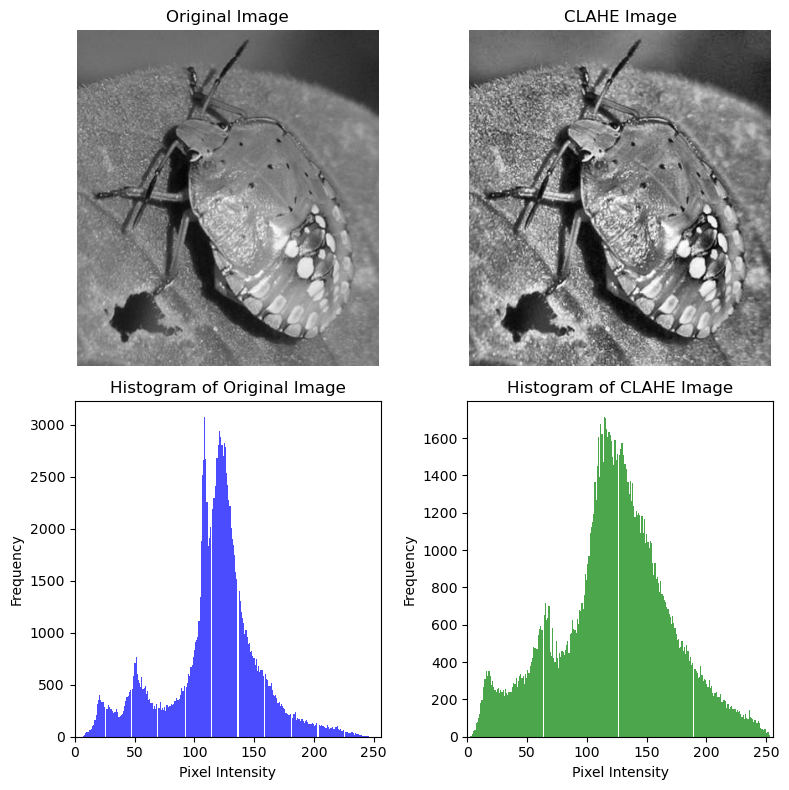

In [53]:


def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)


image_path = Path(r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Final Code\Dataset\train\Nezara Viridula\681c8ecb-f085-4677-a3f3-065a2f30d740.jpg")


image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)

if image is not None:

    clahe_image = apply_clahe(image)

   
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))

    # Display original image
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis('off')

    # Display histogram of original image
    axes[1, 0].hist(image.ravel(), bins=256, color='blue', alpha=0.7)
    axes[1, 0].set_title("Histogram of Original Image")
    axes[1, 0].set_xlim([0, 256])
    axes[1, 0].set_xlabel("Pixel Intensity")
    axes[1, 0].set_ylabel("Frequency")

    # Display CLAHE image
    axes[0, 1].imshow(clahe_image, cmap='gray')
    axes[0, 1].set_title("CLAHE Image")
    axes[0, 1].axis('off')

    # Display histogram of CLAHE image
    axes[1, 1].hist(clahe_image.ravel(), bins=256, color='green', alpha=0.7)
    axes[1, 1].set_title("Histogram of CLAHE Image")
    axes[1, 1].set_xlim([0, 256])
    axes[1, 1].set_xlabel("Pixel Intensity")
    axes[1, 1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()
else:
    print(f"Error: Image at {image_path} could not be loaded.")


VGG16 

In [54]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


def load_data(data_path):
    filepaths = []
    labels = []
    
    
    for plant_class in data_path.iterdir():
        if plant_class.is_dir():
            
            for image_file in plant_class.iterdir(): 
                if image_file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.webp']:
                    filepaths.append(image_file)
                    label = f"{plant_class.name}"  
                    labels.append(label)

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

train_dir = Path(r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Final Code\Dataset\train")
train_image_df = load_data(train_dir)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_image_df['Filepath'], 
    train_image_df['Label'], 
    test_size=0.2, 
    random_state=42, 
    stratify=train_image_df['Label']
)

train_image_df = pd.DataFrame({'Filepath': X_train, 'Label': y_train})
val_image_df = pd.DataFrame({'Filepath': X_val, 'Label': y_val})


label_encoder = LabelEncoder()
train_image_df['Encoded_Label'] = label_encoder.fit_transform(train_image_df['Label'])
val_image_df['Encoded_Label'] = label_encoder.transform(val_image_df['Label'])


def load_cnn_model(input_shape=(224, 224, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Model(inputs=base_model.input, outputs=base_model.output)
    return model


def load_image(filepath, target_size=(224, 224)):
    img = load_img(filepath, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  
    return img_array


def extract_features_from_vgg(image_df, model):
    features = []
    for filepath in image_df['Filepath']:
        img = load_image(filepath)
        feature = model.predict(img)
        features.append(feature.flatten()) 
    return np.array(features)

vgg_model = load_cnn_model()


X_train_vgg = extract_features_from_vgg(train_image_df, vgg_model)
X_val_vgg = extract_features_from_vgg(val_image_df, vgg_model)

# Standardize 
scaler = StandardScaler()
X_train_vgg = scaler.fit_transform(X_train_vgg)
X_val_vgg = scaler.transform(X_val_vgg)

# SMOTE 
smote = SMOTE(random_state=42)
X_train_vgg_resampled, y_train_resampled = smote.fit_resample(X_train_vgg, train_image_df['Encoded_Label'].values)


print(f"Resampled training features shape: {X_train_vgg_resampled.shape}")
print(f"Resampled training labels shape: {y_train_resampled.shape}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


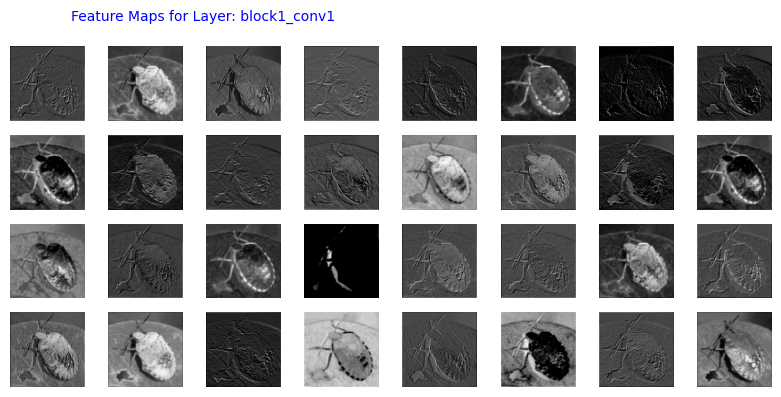

In [101]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model


def load_cnn_model(input_shape=(224, 224, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    return base_model

def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  
    return img_array

def visualize_feature_maps(model, image_path, layer_name, num_rows=4, num_cols=8):
    layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    
    processed_image = preprocess_image(image_path)
    
    # Get the feature maps
    feature_maps = layer_model.predict(processed_image)
    
    # Number of filters in the layer
    num_filters = feature_maps.shape[-1]
    
    rows = min(num_rows, (num_filters + num_cols - 1) // num_cols) 
    
    fig, axes = plt.subplots(rows, num_cols, figsize=(8,4))
    fig.suptitle(f"Feature Maps for Layer: {layer_name}", fontsize=10, color='blue', x=0.1, ha='left')

    
    for i in range(num_filters):
        row = i // num_cols
        col = i % num_cols
        
        if row < rows:
            ax = axes[row, col]
            ax.imshow(feature_maps[0, :, :, i], cmap='gray')
            ax.axis('off')
        else:
            break
    
    plt.tight_layout()
    plt.show()


image_path = Path(r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Final Code\Dataset\train\Nezara Viridula\681c8ecb-f085-4677-a3f3-065a2f30d740.jpg")
vgg_model = load_cnn_model()
layer_name = 'block1_conv1'
visualize_feature_maps(vgg_model, image_path, layer_name, num_rows=4, num_cols=8)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


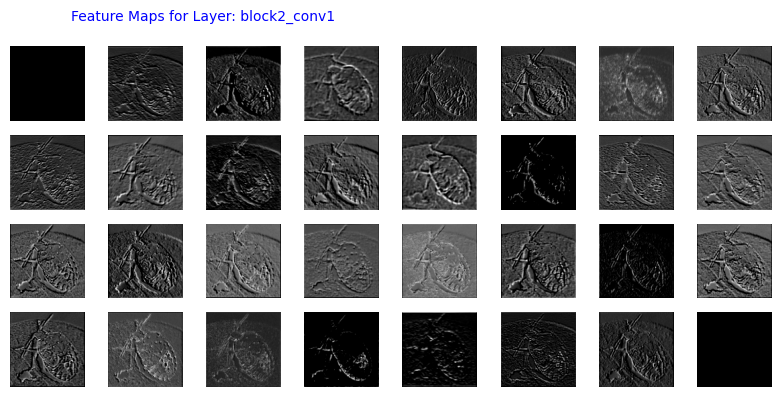

In [103]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model


def load_cnn_model(input_shape=(224, 224, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    return base_model

def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  
    return img_array

def visualize_feature_maps(model, image_path, layer_name, num_rows=4, num_cols=8):
    layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    
    processed_image = preprocess_image(image_path)
    
    # Get the feature maps
    feature_maps = layer_model.predict(processed_image)
    
    # Number of filters in the layer
    num_filters = feature_maps.shape[-1]
    
    rows = min(num_rows, (num_filters + num_cols - 1) // num_cols) 
    
    fig, axes = plt.subplots(rows, num_cols, figsize=(8,4))
    fig.suptitle(f"Feature Maps for Layer: {layer_name}", fontsize=10, color='blue', x=0.1, ha='left')
    
    for i in range(num_filters):
        row = i // num_cols
        col = i % num_cols
        
        if row < rows:
            ax = axes[row, col]
            ax.imshow(feature_maps[0, :, :, i], cmap='gray')
            ax.axis('off')
        else:
            break
    
    plt.tight_layout()
    plt.show()


image_path = Path(r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Final Code\Dataset\train\Nezara Viridula\681c8ecb-f085-4677-a3f3-065a2f30d740.jpg")
vgg_model = load_cnn_model()
layer_name = 'block2_conv1'
visualize_feature_maps(vgg_model, image_path, layer_name, num_rows=4, num_cols=8)




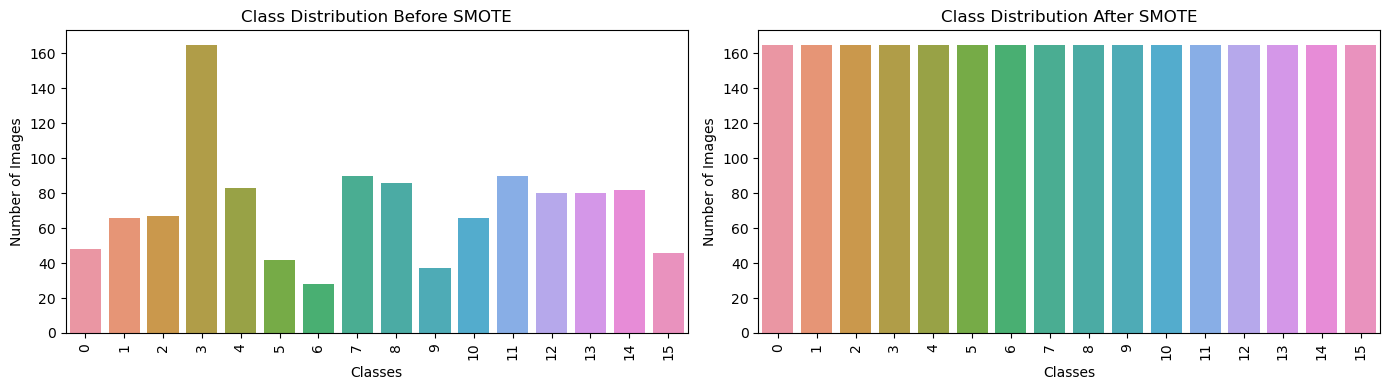

In [72]:

plt.figure(figsize=(14, 4))

# Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=train_image_df['Encoded_Label'])
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.xticks(rotation=90)

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

SVM

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

param_grid = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'max_iter': [1000, 1100]
}


svm = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=2, scoring='accuracy')

# Perform grid search on the resampled training data
grid_search.fit(X_train_vgg_resampled, y_train_resampled)

# Get  best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_svm = SVC(**best_params, random_state=42)
best_svm.fit(X_train_vgg_resampled, y_train_resampled)

# predictions on the validation set
y_pred_svm = best_svm.predict(X_val_vgg)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(val_image_df['Encoded_Label'], y_pred_svm)
print("SVM Accuracy with Tuned Hyperparameters:", val_accuracy)


conf_matrix = confusion_matrix(val_image_df['Encoded_Label'], y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report (Validation):")
print(classification_report(val_image_df['Encoded_Label'], y_pred_svm, target_names=label_encoder.classes_))


C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Hyperparameters: {'kernel': 'linear', 'max_iter': 1000}
SVM Accuracy with Tuned Hyperparameters: 0.896551724137931
Confusion Matrix:
 [[11  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  2  1  0  6  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  1  0 11  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  1  2  0  0 17  0  1  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0 15  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 11]]
Classification Report (Validation):
        

In [113]:
# Use a list of numbers as the target_names
target_names = [str(i) for i in range(len(label_encoder.classes_))]

report_tuned = classification_report(
    val_image_df['Encoded_Label'].values, 
    y_pred_svm , 
    target_names=target_names
)


print("\n SVM Classification Report:\n", report_tuned)
print(f"\nAccuracy: {val_accuracy * 100:.2f}%")


 SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        17
           2       0.89      0.94      0.91        17
           3       0.79      0.90      0.84        42
           4       0.95      0.95      0.95        21
           5       1.00      0.60      0.75        10
           6       0.64      1.00      0.78         7
           7       0.96      1.00      0.98        23
           8       0.75      1.00      0.86        21
           9       1.00      0.78      0.88         9
          10       0.92      0.69      0.79        16
          11       1.00      0.74      0.85        23
          12       1.00      0.75      0.86        20
          13       0.91      1.00      0.95        20
          14       0.95      1.00      0.98        20
          15       0.92      0.92      0.92        12

    accuracy                           0.90       

RF

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [5, 10],    
    'min_samples_leaf': [2, 4]       
}


rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=2, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train_vgg_resampled, y_train_resampled)

best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest Classifier:", best_params_rf)

best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf.fit(X_train_vgg_resampled, y_train_resampled)


y_pred_rf = best_rf.predict(X_val_vgg)


accuracy_rf = accuracy_score(val_image_df['Encoded_Label'].values, y_pred_rf)
print(f"Random Forest Classifier Accuracy : {accuracy_rf * 100:.2f}%")


confusion_rf = confusion_matrix(val_image_df['Encoded_Label'].values, y_pred_rf)
print("\nConfusion Matrix:\n", confusion_rf)

print("\nClassification Report:")
report_rf = classification_report(val_image_df['Encoded_Label'].values, y_pred_rf, target_names=label_encoder.classes_)
print(report_rf)


Best Hyperparameters for Random Forest Classifier: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest Classifier Accuracy : 90.69%

Confusion Matrix:
 [[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  2  0  0  7  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  1  0]
 [ 0  0  0  1  0  0  0  0  0  7  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0 10  2  1  2  0  0]
 [ 0  0  0  0  0  1  0  0  2  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  1  0  0  0 14  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 

In [115]:
# Use a list of numbers as the target_names
target_names = [str(i) for i in range(len(label_encoder.classes_))]

report_tuned = classification_report(
    val_image_df['Encoded_Label'].values, 
    y_pred_rf, 
    target_names=target_names
)


print("\n RF Classification Report:\n", report_tuned)
print(f"\nAccuracy: {accuracy_rf * 100:.2f}%")


 RF Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        17
           2       0.85      1.00      0.92        17
           3       0.95      0.90      0.93        42
           4       1.00      0.95      0.98        21
           5       0.88      0.70      0.78        10
           6       0.64      1.00      0.78         7
           7       1.00      1.00      1.00        23
           8       0.74      0.95      0.83        21
           9       1.00      0.78      0.88         9
          10       1.00      0.62      0.77        16
          11       0.91      0.87      0.89        23
          12       0.88      0.70      0.78        20
          13       0.87      1.00      0.93        20
          14       0.91      1.00      0.95        20
          15       0.92      0.92      0.92        12

    accuracy                           0.91       2

KNN

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}


knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=2, scoring='accuracy', n_jobs=-1)


grid_search_knn.fit(X_train_vgg_resampled, y_train_resampled)

best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN Classifier:", best_params_knn)


best_knn = KNeighborsClassifier(**best_params_knn)
best_knn.fit(X_train_vgg_resampled, y_train_resampled)


y_pred_knn = best_knn.predict(X_val_vgg)


accuracy_knn = accuracy_score(val_image_df['Encoded_Label'].values, y_pred_knn)
print(f"KNN Classifier Accuracy with Tuned Hyperparameters: {accuracy_knn * 100:.2f}%")


confusion_knn = confusion_matrix(val_image_df['Encoded_Label'].values, y_pred_knn)
print("\nConfusion Matrix:\n", confusion_knn)


report_knn = classification_report(val_image_df['Encoded_Label'].values, y_pred_knn, 
                                    target_names=label_encoder.classes_)
print("\nClassification Report:\n", report_knn)


Best Hyperparameters for KNN Classifier: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
KNN Classifier Accuracy with Tuned Hyperparameters: 79.31%

Confusion Matrix:
 [[ 8  0  0  0  0  0  0  0  0  1  1  0  0  0  1  1]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  3  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 38  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  1  0  0  5  0  0  0  0  0  1  0  0  0  3]
 [ 0  0  0  0  0  0  6  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  2  0  0  0 15  0  1  0  0  0  1  1]
 [ 0  0  0  0  0  1  0  0  0  5  0  1  0  0  0  2]
 [ 0  0  1  0  2  0  0  0  1  0 11  1  0  0  0  0]
 [ 0  0  1  0  1  0  0  1  0  0  0 15  0  0  0  5]
 [ 0  1  0  0  2  0  2  0  0  0  0  2 11  0  1  1]
 [ 0  0  3  0  4  0  0  0  0  0  0  0  0 11  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 12]]

Classificati

In [117]:
# Use a list of numbers as the target_names
target_names = [str(i) for i in range(len(label_encoder.classes_))]

report_tuned = classification_report(
    val_image_df['Encoded_Label'].values, 
    y_pred_knn, 
    target_names=target_names
)


print("\n KNN Classification Report:\n", report_tuned)
print(f"\nAccuracy: {accuracy_knn * 100:.2f}%")


 KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.89      1.00      0.94        17
           2       0.68      0.76      0.72        17
           3       1.00      0.90      0.95        42
           4       0.59      0.95      0.73        21
           5       0.83      0.50      0.62        10
           6       0.75      0.86      0.80         7
           7       0.96      1.00      0.98        23
           8       0.71      0.71      0.71        21
           9       0.83      0.56      0.67         9
          10       0.85      0.69      0.76        16
          11       0.75      0.65      0.70        23
          12       1.00      0.55      0.71        20
          13       1.00      0.55      0.71        20
          14       0.83      1.00      0.91        20
          15       0.43      1.00      0.60        12

    accuracy                           0.79       

NB

In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}


nb = GaussianNB()


grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=2, scoring='accuracy', n_jobs=-1)


grid_search_nb.fit(X_train_vgg_resampled, y_train_resampled)

best_params_nb = grid_search_nb.best_params_
print("Best Hyperparameters for Naive Bayes Classifier:", best_params_nb)

best_nb = GaussianNB(**best_params_nb)
best_nb.fit(X_train_vgg_resampled, y_train_resampled)


y_pred_nb_tuned = best_nb.predict(X_val_vgg)


accuracy_nb_tuned = accuracy_score(val_image_df['Encoded_Label'].values, y_pred_nb_tuned)
print(f"Accuracy of Naive Bayes with Tuned Hyperparameters: {accuracy_nb_tuned * 100:.2f}%")


confusion_nb_tuned = confusion_matrix(val_image_df['Encoded_Label'].values, y_pred_nb_tuned)
print("\nConfusion Matrix:\n", confusion_nb_tuned)

report_nb_tuned = classification_report(val_image_df['Encoded_Label'].values, y_pred_nb_tuned, 
                                        target_names=label_encoder.classes_)
print("\nClassification Report:\n", report_nb_tuned)


Best Hyperparameters for Naive Bayes Classifier: {'var_smoothing': 1e-07}
Accuracy of Naive Bayes with Tuned Hyperparameters: 79.31%

Confusion Matrix:
 [[ 9  0  0  0  0  0  0  1  1  1  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  1  0  0  1  1  0  2  0  1  0  0]
 [ 0  0  0 38  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  6  0  0  2  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  2  0  0  0]
 [ 0  0  1  0  0  0  0 19  3  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0 17  0  2  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  1  1  2  0  0  0]
 [ 0  0  0  0  0  0  1  0  1  1 10  1  0  2  0  0]
 [ 1  0  0  0  0  0  0  0  3  0  3 16  0  0  0  0]
 [ 0  2  0  0  0  0  2  1  0  0  0  0 15  0  0  0]
 [ 0  0  2  1  0  0  0  1  0  1  0  0  3 12  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0 10]]

Classification Report:
      

In [118]:
# Use a list of numbers as the target_names
target_names = [str(i) for i in range(len(label_encoder.classes_))]

report_tuned = classification_report(
    val_image_df['Encoded_Label'].values, 
    y_pred_nb_tuned, 
    target_names=target_names
)


print("\n NB Classification Report:\n", report_tuned)
print(f"\nAccuracy: {accuracy_nb_tuned* 100:.2f}%")


 NB Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.89      1.00      0.94        17
           2       0.73      0.65      0.69        17
           3       0.95      0.90      0.93        42
           4       1.00      0.95      0.98        21
           5       0.86      0.60      0.71        10
           6       0.42      0.71      0.53         7
           7       0.86      0.83      0.84        23
           8       0.61      0.81      0.69        21
           9       0.56      0.56      0.56         9
          10       0.62      0.62      0.62        16
          11       0.80      0.70      0.74        23
          12       0.58      0.75      0.65        20
          13       0.80      0.60      0.69        20
          14       1.00      1.00      1.00        20
          15       1.00      0.83      0.91        12

    accuracy                           0.79       2

MLP

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50), (100, 100)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.001, 0.01],
    'learning_rate_init': [0.01, 0.1]
}


mlp = MLPClassifier(random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.1)


grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=2, scoring='accuracy', n_jobs=-1)


grid_search_mlp.fit(X_train_vgg_resampled, y_train_resampled)


best_params_mlp = grid_search_mlp.best_params_
print("Best Hyperparameters for MLP Classifier:", best_params_mlp)


best_mlp = MLPClassifier(**best_params_mlp, random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.1)
best_mlp.fit(X_train_vgg_resampled, y_train_resampled)


y_pred_mlp_tuned = best_mlp.predict(X_val_vgg)


accuracy_mlp_tuned = accuracy_score(val_image_df['Encoded_Label'].values, y_pred_mlp_tuned)
print(f"\nMLP Classifier Accuracy with Tuned Hyperparameters: {accuracy_mlp_tuned:.4f}")


mlp_confusion_tuned = confusion_matrix(val_image_df['Encoded_Label'].values, y_pred_mlp_tuned)
print("\nMLP Confusion Matrix with Tuned Hyperparameters:\n", mlp_confusion_tuned)


mlp_report_tuned = classification_report(val_image_df['Encoded_Label'].values, y_pred_mlp_tuned, 
                                         target_names=label_encoder.classes_)
print("\nMLP Classification Report with Tuned Hyperparameters:\n", mlp_report_tuned)


Best Hyperparameters for MLP Classifier: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01}

MLP Classifier Accuracy with Tuned Hyperparameters: 0.8966

MLP Confusion Matrix with Tuned Hyperparameters:
 [[11  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  1  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0 36  2  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  2  1  0  6  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  1  0 14  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  1  0  0 19  0  1  0  0]
 [ 0  0  0  1  0  0  2  1  0  0  0  1 15  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 19  0  0]
 [ 0  0  0  0  0  0  0  0  0  

In [119]:

target_names = [str(i) for i in range(len(label_encoder.classes_))]

report_tuned = classification_report(
    val_image_df['Encoded_Label'].values, 
    y_pred_mlp_tuned, 
    target_names=target_names
)


print("\n MLP Classification Report:\n", report_tuned)
print(f"\nAccuracy: {accuracy_mlp_tuned* 100:.2f}%")


 MLP Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        17
           2       0.79      0.88      0.83        17
           3       0.82      0.86      0.84        42
           4       0.87      0.95      0.91        21
           5       1.00      0.60      0.75        10
           6       0.75      0.86      0.80         7
           7       0.96      1.00      0.98        23
           8       0.75      1.00      0.86        21
           9       1.00      0.89      0.94         9
          10       1.00      0.88      0.93        16
          11       0.90      0.83      0.86        23
          12       1.00      0.75      0.86        20
          13       0.90      0.95      0.93        20
          14       1.00      1.00      1.00        20
          15       0.91      0.83      0.87        12

    accuracy                           0.90       

ET

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


param_grid_et = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}


et = ExtraTreesClassifier(n_estimators=100, random_state=42)


grid_search_et = GridSearchCV(estimator=et, param_grid=param_grid_et, cv=2, scoring='accuracy', n_jobs=-1)


grid_search_et.fit(X_train_vgg_resampled, y_train_resampled)


best_params_et = grid_search_et.best_params_
print("Best Hyperparameters for Extra Trees Classifier:", best_params_et)


best_et = ExtraTreesClassifier(n_estimators=100, random_state=42, **best_params_et)
best_et.fit(X_train_vgg_resampled, y_train_resampled)


y_pred_et = best_et.predict(X_val_vgg)


accuracy_et = accuracy_score(val_image_df['Encoded_Label'], y_pred_et)
print("\nExtra Trees Classifier Accuracy with Tuned Hyperparameters:", accuracy_et)


extra_trees_confusion = confusion_matrix(val_image_df['Encoded_Label'], y_pred_et)
extra_trees_report = classification_report(val_image_df['Encoded_Label'], y_pred_et,
                                           target_names=label_encoder.classes_)

print("\nExtra Trees Confusion Matrix with Tuned Hyperparameters:\n", extra_trees_confusion)
print("\nExtra Trees Classification Report with Tuned Hyperparameters:\n", extra_trees_report)


Best Hyperparameters for Extra Trees Classifier: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}

Extra Trees Classifier Accuracy with Tuned Hyperparameters: 0.906896551724138

Extra Trees Confusion Matrix with Tuned Hyperparameters:
 [[11  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  4  0  0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  7  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  1  0 12  2  0  0  1  0]
 [ 0  0  0  0  0  2  0  1  1  0  0 18  0  1  0  0]
 [ 0  0  1  0  0  0  3  0  0  0  0  2 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  

In [120]:
# Use a list of numbers as the target_names
target_names = [str(i) for i in range(len(label_encoder.classes_))]

report_tuned = classification_report(
    val_image_df['Encoded_Label'].values, 
    y_pred_et, 
    target_names=target_names
)


print("\n Extra Trees Classification Report:\n", report_tuned)
print(f"\nAccuracy: {accuracy_et * 100:.2f}%")


 Extra Trees Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        17
           2       0.77      1.00      0.87        17
           3       1.00      0.90      0.95        42
           4       0.95      0.95      0.95        21
           5       0.75      0.60      0.67        10
           6       0.70      1.00      0.82         7
           7       0.96      1.00      0.98        23
           8       0.75      1.00      0.86        21
           9       1.00      0.78      0.88         9
          10       1.00      0.75      0.86        16
          11       0.82      0.78      0.80        23
          12       1.00      0.70      0.82        20
          13       0.91      1.00      0.95        20
          14       0.95      1.00      0.98        20
          15       0.92      1.00      0.96        12

    accuracy                           0.9

Ensemble

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np


X_ensemble = np.column_stack((
    y_pred_svm,
    y_pred_rf,
    y_pred_knn,
    y_pred_nb_tuned,
    y_pred_mlp_tuned,
    y_pred_et
))


param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


base_meta_model = RandomForestClassifier(random_state=42)


tuner = GridSearchCV(estimator=base_meta_model, param_grid=param_grid_rf, 
                     scoring='accuracy', cv=3, n_jobs=-1)


tuner.fit(X_ensemble, val_image_df['Encoded_Label'].values)


best_params_rf = tuner.best_params_
print("Best Hyperparameters for Meta RandomForest Classifier:", best_params_rf)


meta_model_tuned = RandomForestClassifier(**best_params_rf, random_state=42)
meta_model_tuned.fit(X_ensemble, val_image_df['Encoded_Label'].values)


y_pred_combined_tuned = meta_model_tuned.predict(X_ensemble)


accuracy_tuned = accuracy_score(val_image_df['Encoded_Label'].values, y_pred_combined_tuned)
print(f"Tuned Combined Classifier Accuracy: {accuracy_tuned * 100:.2f}%")


confusion_tuned = confusion_matrix(val_image_df['Encoded_Label'].values, y_pred_combined_tuned)
report_tuned = classification_report(
    val_image_df['Encoded_Label'].values, 
    y_pred_combined_tuned, 
    target_names=label_encoder.classes_
)

print("\nConfusion Matrix:\n", confusion_tuned)
print("\nClassification Report:\n", report_tuned)
print(f"\nAccuracy: {accuracy_tuned * 100:.2f}%")

Best Hyperparameters for Meta RandomForest Classifier: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Combined Classifier Accuracy: 97.59%

Confusion Matrix:
 [[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  0  0  0  0 21  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0 

In [111]:
# Use a list of numbers as the target_names
target_names = [str(i) for i in range(len(label_encoder.classes_))]

report_tuned = classification_report(
    val_image_df['Encoded_Label'].values, 
    y_pred_combined_tuned, 
    target_names=target_names
)


print("\nClassification Report:\n", report_tuned)
print(f"\nAccuracy: {accuracy_tuned * 100:.2f}%")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        17
           3       0.95      1.00      0.98        42
           4       1.00      1.00      1.00        21
           5       0.89      0.80      0.84        10
           6       0.78      1.00      0.88         7
           7       1.00      1.00      1.00        23
           8       1.00      0.95      0.98        21
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        16
          11       1.00      0.91      0.95        23
          12       1.00      0.90      0.95        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        12

    accuracy                           0.98       290
 

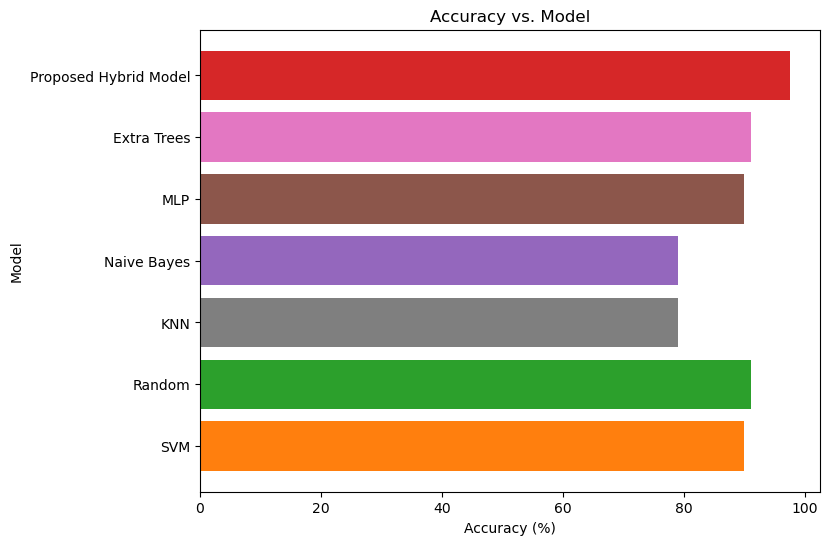

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for your models
model_names = ['SVM', 'Random', 'KNN', 'Naive Bayes', 'MLP', 'Extra Trees', 'Proposed Hybrid Model']
accuracies = [90.00, 91.00, 79.00, 79.00, 90.00, 91.00, 97.59]

# Set the color palette
colors = ['#ff7f0e', '#2ca02c', '#7f7f7f', '#9467bd', '#8c564b', '#e377c2', '#d62728']

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(model_names, accuracies, color=colors)

# Add labels and title
ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('Model')
ax.set_title('Accuracy vs. Model')


plt.show()